In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.pipeline import Pipeline


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D


import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
import os
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Contest/Titanic_data/train.csv')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [74]:
features=['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked']
target=['Survived']

In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(0, inplace=True)

In [75]:
X_train,X_cv,y_train,y_cv=train_test_split(df[features],df[target],test_size=0.2,random_state=42)

In [117]:
pipe_2=pickle.load(open('/content/model.pkl','rb'))

In [118]:
import shap

In [119]:
explainer=shap.Explainer(pipe_2.predict,X_train)
shap_values=explainer(X_train)

ExactExplainer explainer: 713it [00:12, 10.40it/s]


In [120]:
np.shape(shap_values.values)

(712, 5)

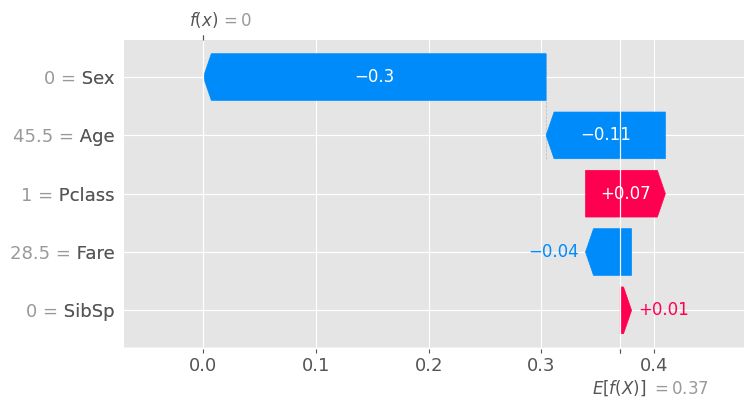

In [121]:
shap.plots.waterfall(shap_values[0])

In [122]:
shap.initjs()
shap.force_plot(shap_values[0])

In [123]:
shap.initjs()
shap.plots.force(shap_values[:10])

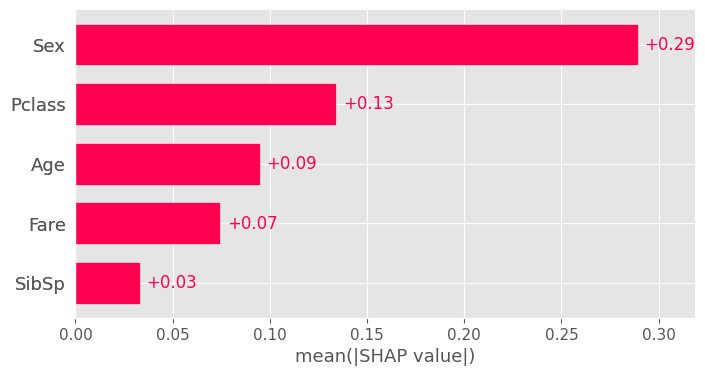

In [124]:
shap.initjs()
shap.plots.bar(shap_values)

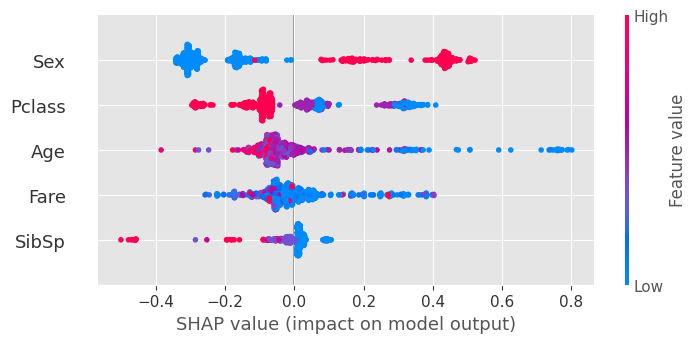

In [125]:
shap.initjs()
shap.plots.beeswarm(shap_values)

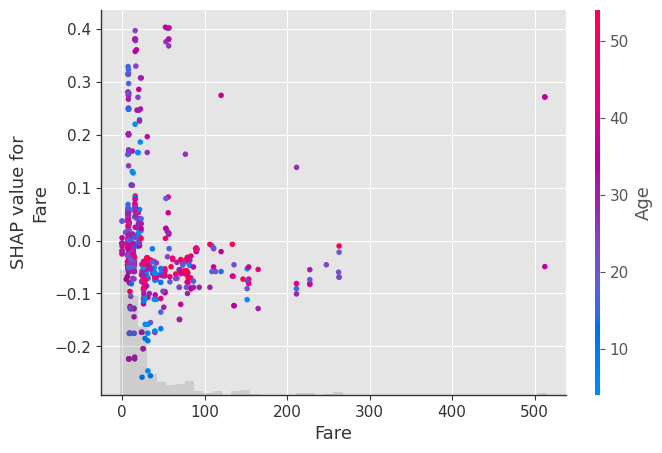

In [126]:
shap.initjs()
shap.plots.scatter(shap_values[:, "Fare"],color=shap_values[:,1])